In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [74]:
directories = ['tw/pb_ratio', "../db/tw/price"]
parquet_files = [os.path.join(directories[1], f) for f in os.listdir(directories[1]) if f.endswith(".parquet") and len(f.split(".")[0]) == 4] 
dfs = [None] * len(parquet_files)
for index, file in enumerate(parquet_files):
    df = pd.read_parquet(file)
    try:
        yearly_cl = df.pivot(values='cl', index='da', columns='ticker').sort_index(ascending=True)
    except KeyError:
        yearly_cl = df
    dfs[index] = yearly_cl
df = pd.concat(dfs).sort_index(ascending = True)
df.replace("--", None, inplace=True)
pivoted = df.ffill()
pivoted = pivoted.astype(float)
pivoted.astype(float).to_parquet(f"../db/tw/pdata/close.parquet")
pivoted_pct = pivoted.pct_change().dropna(how="all")
pivoted_pct.to_parquet(f'../db/tw/pdata/close_pct.parquet')

In [75]:
pd.read_parquet("../db/tw/pdata/close_pct.parquet")

ticker,0050,0051,0052,0053,0055,0056,0057,0061,1101,1102,...,6863,6869,6873,6901,6902,6906,6916,6933,6937,8476
da,,,,,,,,,,,,,,,,,,,,,
2019-01-03,-0.025033,-0.012298,-0.032258,-0.014412,-0.007264,-0.007894,-0.020479,-0.002770,-0.009736,-0.007267,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-04,-0.016216,-0.010317,-0.017735,-0.026255,-0.011585,-0.014657,-0.020463,0.008333,0.001404,0.001464,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-07,0.017170,0.020848,0.020231,0.015017,0.009254,0.008500,0.018165,0.015840,0.015428,0.021930,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-08,0.001350,0.000000,-0.001919,0.002690,0.005501,0.002950,0.000000,-0.004746,-0.006906,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-09,0.013486,0.003169,0.014100,0.013078,0.014590,0.012605,0.016503,0.025204,0.011127,0.008584,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-24,-0.014271,-0.001175,-0.015754,-0.010234,0.004335,-0.002860,-0.014095,-0.007013,0.001441,0.001116,...,0.035714,0.098507,0.037234,-0.001163,0.000000,-0.022727,0.000000,-0.063745,0.019802,-0.001616
2024-06-25,-0.013941,-0.009412,-0.014379,-0.015263,0.003237,-0.011472,-0.009164,-0.002354,-0.005755,-0.003344,...,-0.049808,0.097826,0.005128,-0.010477,0.000000,-0.013289,0.003534,-0.042553,0.000000,0.022654
2024-06-26,0.011963,0.006532,0.013212,0.015000,-0.005737,0.005077,0.011099,-0.003540,-0.002894,-0.015660,...,0.018145,0.061881,0.061224,0.043529,-0.032544,0.020202,-0.001761,0.045926,0.063107,0.006329


In [33]:
values_dict = {
    "cl": "close",
    "op": "open",
    "vol(turnover)": "volume",
    'vol(volume)': "volume(share)",
    "yield": "yield",
    "pe_ratio": "pe_ratio",
    "pb_ratio": "pb_ratio",
}
values = 'vol(turnover)'
pivoted = df_concat.pivot(index='da', values=values, columns="ticker")
pivoted.replace("--", None, inplace=True)
pivoted = pivoted.ffill()
pivoted = pivoted.astype(float)
pivoted.astype(float).to_parquet(f"tw/pdata/{values_dict[values]}.parquet")
pivoted_pct = pivoted.pct_change().dropna(how="all")
pivoted_pct.to_parquet(f'tw/pdata/{values_dict[values]}_pct.parquet')

### Finanical Statements tester -- GoodInfo

In [5]:
import requests
from bs4 import BeautifulSoup
url_stock_list_goodinfo = "https://goodinfo.tw/tw/Lib.js/StockTW_ID_NM_List.js?45482.4170601852"
res = requests.get(url_stock_list_goodinfo)
soup = BeautifulSoup(res.text, 'lxml')
soup

<html><body><p>/*檔案更新時間:2024/07/09 06:09:19*/
var garrTW_LIST_STOCK_ID_NM = ['0000 加權指數','0001 櫃買指數','0050 元大台灣50','0051 元大中型100','0052 富邦科技','0053 元大電子','0055 元大MSCI金融','0056 元大高股息','0057 富邦摩台','0061 元大寶滬深','006201 元大富櫃50','006203 元大MSCI台灣','006204 永豐臺灣加權','006205 富邦上証','006206 元大上證50','006207 復華滬深','006208 富邦台50','00625K 富邦上証+R','00631L 元大台灣50正2','00632R 元大台灣50反1','00633L 富邦上証正2','00634R 富邦上証反1','00635U 期元大S&amp;P黃金','00636 國泰中國A50','00636K 國泰中國A50+U','00637L 元大滬深300正2','00638R 元大滬深300反1','00639 富邦深100','00640L 富邦日本正2','00641R 富邦日本反1','00642U 期元大S&amp;P石油','00643 群益深証中小','00643K 群益深証中小+R','00645 富邦日本','00646 元大S&amp;P500','00647L 元大S&amp;P500正2','00648R 元大S&amp;P500反1','00650L 復華香港正2','00651R 復華香港反1','00652 富邦印度','00653L 富邦印度正2','00654R 富邦印度反1','00655L 國泰中國A50正2','00656R 國泰中國A50反1','00657 國泰日經225','00657K 國泰日經225+U','00660 元大歐洲50','00661 元大日經225','00662 富邦NASDAQ','00663L 國泰臺灣加權正2','00664R 國泰臺灣加權反1','00665L 富邦恒生國企正2','00666R 富邦恒生國企反1','00668 國泰美國道瓊','00668K 國泰美國道瓊+U','00669R 國泰美國道瓊反1'

In [4]:
import requests
import zipfile
import os

# 下载 ChromeDriver
url = "https://storage.googleapis.com/chrome-for-testing-public/126.0.6478.126/mac-x64/chromedriver-mac-x64.zip"
response = requests.get(url)

# 将文件保存到本地
with open("../db/chromedriver-mac-x64.zip", "wb") as file:
    file.write(response.content)

# 解压缩文件
with zipfile.ZipFile("../db/chromedriver-mac-x64.zip", "r") as zip_ref:
    zip_ref.extractall("../db/chromedriver_mac")

# 获取 ChromeDriver 路径
chromedriver_path = os.path.abspath("../db/chromedriver_mac/chromedriver-mac-x64/chromedriver")
print(f"ChromeDriver 路径: {chromedriver_path}")


ChromeDriver 路径: /Users/test/risksoft/TS/db/chromedriver_mac/chromedriver-mac-x64/chromedriver


### Test seperate yearly loop into 10 ish files and concat them here

In [72]:
import pandas as pd
import os

def _format(f):
    return f.split('/')[-1].split('.')[0].split("_")[-1]

path = '../db/tw/price'
parquet_files = [[os.path.join(path, f) for f in os.listdir(path) if f.endswith(".parquet") and _format(f) == str(year)] for year in range(2021, 2018, -1)]
parquet_files

[['../db/tw/price/400_2021.parquet',
  '../db/tw/price/300_2021.parquet',
  '../db/tw/price/200_2021.parquet',
  '../db/tw/price/500_2021.parquet',
  '../db/tw/price/700_2021.parquet',
  '../db/tw/price/800_2021.parquet',
  '../db/tw/price/100_2021.parquet',
  '../db/tw/price/900_2021.parquet',
  '../db/tw/price/2021.parquet',
  '../db/tw/price/600_2021.parquet',
  '../db/tw/price/1000_2021.parquet',
  '../db/tw/price/1100_2021.parquet'],
 ['../db/tw/price/500_2020.parquet',
  '../db/tw/price/200_2020.parquet',
  '../db/tw/price/300_2020.parquet',
  '../db/tw/price/400_2020.parquet',
  '../db/tw/price/600_2020.parquet',
  '../db/tw/price/100_2020.parquet',
  '../db/tw/price/2020.parquet',
  '../db/tw/price/900_2020.parquet',
  '../db/tw/price/800_2020.parquet',
  '../db/tw/price/700_2020.parquet',
  '../db/tw/price/1100_2020.parquet',
  '../db/tw/price/1000_2020.parquet'],
 ['../db/tw/price/1000_2019.parquet',
  '../db/tw/price/1100_2019.parquet',
  '../db/tw/price/300_2019.parquet',
 

In [73]:
dfs = []
for file in parquet_files[-1]:
    print(file)
    df = pd.read_parquet(file)
    df1 = df.drop_duplicates(subset=['da', 'ticker'])
    dfs.append(df1)
    
df_concat = pd.concat(dfs)
df_concat1 = df_concat.drop_duplicates(subset=['da', 'ticker'])
pivoted = df_concat1.pivot(index='da', values="cl", columns="ticker").loc['2019-01-01':'2020-01-01']
pivoted.to_parquet('../db/tw/price/2019.parquet')

../db/tw/price/1000_2019.parquet
../db/tw/price/1100_2019.parquet
../db/tw/price/300_2019.parquet
../db/tw/price/400_2019.parquet
../db/tw/price/500_2019.parquet
../db/tw/price/200_2019.parquet
../db/tw/price/800_2019.parquet
../db/tw/price/700_2019.parquet
../db/tw/price/600_2019.parquet
../db/tw/price/100_2019.parquet
../db/tw/price/900_2019.parquet


In [82]:
from datetime import datetime
def _data_cleaning_pbratio( data):
    if isinstance(data, str) and "年" in data:
        year_tw, other = data.split("年")
        year = int(year_tw) + 1911
        month, o = other.split("月")
        day = o[:2]
        return datetime.strptime(f"{year}-{month}-{day}", "%Y-%m-%d")
    else:
        return data
def _get_pbratio_TWSE(stock_symbol='2330', year=2024):
    list_concat = []
    limit_month = 7 if year == 2024 else 13
    for month in range(1, limit_month):
        month = f"0{month}" if month < 10 else month
        da = f"{year}{month}01"
        url_json = f"https://www.twse.com.tw/rwd/zh/afterTrading/BWIBBU?date={da}&stockNo={stock_symbol}&response=json"
        response = requests.get(url_json)
        dicts = response.json()
        try:
            data = dicts['data']
            data = [[_data_cleaning_pbratio(j[i]) for i in range(len(j))] for j in data]
            for sublist in data:
                sublist.append(stock_symbol) 
            df = pd.DataFrame(data)
            list_concat.append(df)
        except KeyError:
            if month == 1:
                return None
            continue
    df_final = pd.concat(list_concat)
    df_final.columns = ['da', 'yield', 'year', 'pe', 'pb', 'fs_q', 'ticker']
    return df_final
df = _get_pbratio_TWSE()
df

,da,yield,year,pe,pb,fs_q,ticker
0,2024-01-02,1.85,111,17.17,4.59,112/3,2330
1,2024-01-03,1.90,111,16.73,4.48,112/3,2330
2,2024-01-04,1.90,111,16.79,4.49,112/3,2330
3,2024-01-05,1.91,111,16.68,4.46,112/3,2330
4,2024-01-08,1.89,111,16.88,4.52,112/3,2330
...,...,...,...,...,...,...,...
14,2024-06-24,1.38,112,28.45,6.71,113/1,2330
15,2024-06-25,1.38,112,28.60,6.74,113/1,2330
16,2024-06-26,1.35,112,29.06,6.85,113/1,2330
17,2024-06-27,1.35,112,29.06,6.85,113/1,2330


In [83]:
def _data_cleaning_price(data):
    if "/" in data:
        year, month, day = map(int, data.split('/'))
        return datetime.strptime(f"{year+1911}-{month}-{day}", "%Y-%m-%d")
    else:
        return data.replace(",", "")
def _get_price_TWSE(stock_symbol = '2330', year=2024):
    list_concat = []
    limit_month = 7 if year == 2024 else 13
    df_final = pd.DataFrame()
    for month in range(1, limit_month):
        month = f"0{month}" if month < 10 else month
        da = f"{year}{month}01"

        url_json = f"https://www.twse.com.tw/exchangeReport/STOCK_DAY?response=json&date={da}&stockNo={stock_symbol}"
        response = requests.get(url_json)
        dicts = response.json()
        try:
            data = dicts['data']

            data = [[_data_cleaning_price(i[j]) for j in range(len(data[0]))] for i in data]
            for sublist in data:
                sublist.append(stock_symbol)
            df = pd.DataFrame(data)
            list_concat.append(df)
                
            df_final = pd.concat(list_concat)
        except:
            continue
    return df_final

df = _get_price_TWSE()
df

,0,1,2,3,4,5,6,7,8,9
0,2024-01-02,27997826,16549619798,590.00,593.00,589.00,593.00,0.00,20667,2330
1,2024-01-03,40134497,23267025945,584.00,585.00,576.00,578.00,-15.00,56916,2330
2,2024-01-04,18063758,10466284102,580.00,581.00,577.00,580.00,+2.00,15010,2330
3,2024-01-05,22008878,12685460114,578.00,580.00,574.00,576.00,-4.00,28660,2330
4,2024-01-08,19270119,11232942053,582.00,585.00,579.00,583.00,+7.00,19950,2330
...,...,...,...,...,...,...,...,...,...,...
14,2024-06-24,74081708,70162177693,958.00,960.00,940.00,940.00,-30.00,227255,2330
15,2024-06-25,62079701,57978440842,925.00,945.00,923.00,945.00,+5.00,103844,2330
16,2024-06-26,48821135,46668874056,951.00,960.00,951.00,960.00,+15.00,56563,2330
17,2024-06-27,41276086,39447006518,951.00,961.00,949.00,960.00,0.00,41133,2330


In [99]:
pct_close = pd.read_parquet("../db/tw/pdata/close_pct.parquet")
pct_close_w = pct_close.resample("W-FRI").sum()

In [101]:
factor_ = '../db/factor'
list_ = os.listdir(factor_)
print(list_)
dfs = []
for file in list_:
    df = pd.read_parquet("../db/factor/" + file)
    dfs.append(df)
factor = pd.concat(dfs).sort_index(ascending = True)
factor.sort_index(ascending=True, inplace=True)

['ARMA_2020_all_factor.parquet', 'ARMA_2021to20221118_all_factor.parquet', 'ARMA_since2023_all_factor.parquet']


In [106]:
factor.to_parquet("../db/factor/F_ARMA_2020_20240628.parquet")

<Axes: title={'center': '10 quantile cumsum distribution'}, xlabel='da'>

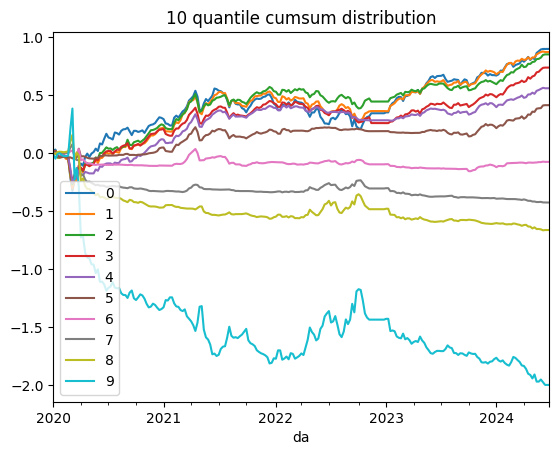

In [103]:
def get_demean_weighting(factor):
    df1 = factor.dropna(axis='columns', how='all').copy()
    demean = df1.sub(df1.mean(axis=1), axis=0)
    weighting = demean.div(demean.abs().sum(axis=1), axis=0)
    return weighting
def _reweighting_equal(weighting:pd.DataFrame):
    def equal_weight(row: pd.Series):
        count_larger_than_zero = (row != 0).sum()
        if count_larger_than_zero > 0:
            row = row.apply(lambda x: 1 / count_larger_than_zero if x > 0 else x)
        return row
    return weighting.apply(equal_weight, axis=1)
quantile = 10
time_length = len(factor)
quantile_column = [[None]*quantile]*time_length
quantile_df = pd.DataFrame(quantile_column)
for da in range(time_length):
    row = factor.iloc[da, :]
    col = row.sort_values(ascending=False).index
    for i in range(0, quantile):
        quantile_df.iloc[da, i] = list(col[i*int(len(row)/quantile):(i+1)*int(len(row)/quantile)])

pct_close_w_corres = pct_close_w[pct_close_w.columns.intersection(factor.columns)].shift(-2)

index = factor.index
quantiles = [None] * quantile
for qt_iter in range(quantile):
    quantile_1 = quantile_df.iloc[:, qt_iter]
    df_1 = factor.copy()
    for i in range(len(quantile_1)):
        df_1.loc[index[i], ~df_1.columns.isin(quantile_1[i])] = 0
    weighting_1 = _reweighting_equal(df_1)
    ret = pct_close_w_corres.loc[weighting_1.index[0]:] * weighting_1
    quantiles[qt_iter] = ret.sum(axis=1).cumsum()

quantilized_cumsum = pd.DataFrame(quantiles).T
quantilized_cumsum.plot(title="10 quantile cumsum distribution")

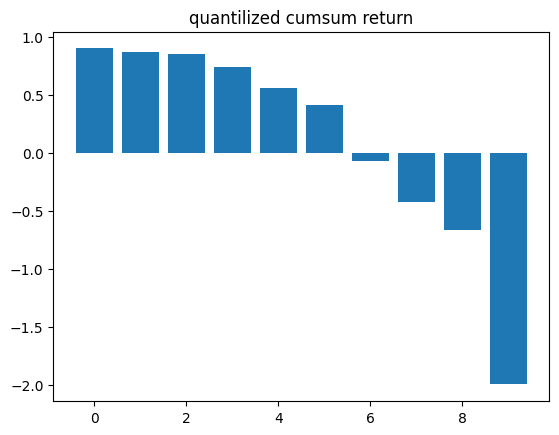

In [105]:
import matplotlib.pyplot as plt
"""
0: AR預測值最高; 9: 最低 (number of stocks in thje stock pool: 1013; stocks per quantile: 100, 等權做多報酬)
"""
plt.bar(quantilized_cumsum.columns, quantilized_cumsum.iloc[-1, :])
plt.title("quantilized cumsum return")
plt.show()
